In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib import style
import missingno as msno
import os
import warnings
warnings.filterwarnings("ignore")
# warnings.filterwarnings('always')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
plt.style.use("bmh")
sns.set(style='whitegrid',color_codes=True)
%matplotlib inline
from sklearn.decomposition import PCA


# classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# #regression
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeRegressor
# from xgboost import XGBRegressor
# from catboost import CatBoostRegressor
# from lightgbm import LGBMRegressor
# from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet,RidgeCV

# #model selection
# from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, KFold, train_test_split, cross_validate

# #evaluation metrics
# from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

from sklearn import metrics

from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

# Workflow goals
The data science solutions workflow solves for seven major goals.

### Classifying. 
We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

### Correlating.
One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

### Converting.
For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

### Completing.
Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

### Correcting.
We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

### Creating.
Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

### Charting. 
How to select the right visualization plots and charts depending on nature of the data and the solution goals.

In [2]:
train = pd.read_csv('train.csv')
df=train.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [5]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [6]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [7]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


<AxesSubplot:>

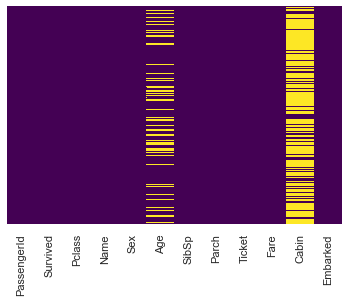

In [12]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

In [13]:
df.Age.isna().sum()

177

In [14]:
df.Cabin.isna().sum()

687

In [15]:
df.Embarked.isna().sum()

2

In [16]:
def check_missing_values(df, df_name=None):
    print(f'{df_name} - Missing values:')
    print('-'*30)
    columns = df.columns

    for column in columns:
        count_missing_values = df[column].isnull().sum()
        missing_values = (count_missing_values / len(df[column])) * 100
    
        if missing_values !=0:
            print(f'{column} --> {count_missing_values} values | {missing_values:.2f}%')

In [17]:
check_missing_values(df,'train')

train - Missing values:
------------------------------
Age --> 177 values | 19.87%
Cabin --> 687 values | 77.10%
Embarked --> 2 values | 0.22%


In [18]:
df[df.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [19]:
df[df.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Summary of Variables and what to do with each one

PassengerId: Unique identification of the passenger. -> Delete

Survived: Survival (0 = No, 1 = Yes). -> Ready

Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd). -> Encode (categorical)

Name: Name of the passenger. -> Still don't know

Sex: Sex. -> Encode (categorical)

Age: Age in years. -> Fill missing values in an easy way and maybe group in intervals

SibSp: # of siblings / spouses aboard the Titanic. -> Ready

Parch: # of parents / children aboard the Titanic. -> Ready

Ticket: Ticket number. -> Delete?

Fare: Passenger fare. -> Maybe group in intervals

Cabin: Cabin number. -> Delete

Embarked: Port of Embarkation. Encode (categorical)

In [20]:
for i,cat in enumerate(df[['Survived', 'Pclass', 'Sex', 'Parch', 'SibSp', 'Embarked']]):
    val_counts = df[cat].value_counts()
    dominant_frac = val_counts.iloc[0:7] / len(df)
    print(f'`{val_counts.index[0]}` alone contributes to {round(dominant_frac * 100, 2)}% of {cat}')
    print('----------------------------------')

`0` alone contributes to 0    61.62
1    38.38
Name: Survived, dtype: float64% of Survived
----------------------------------
`3` alone contributes to 3    55.11
1    24.24
2    20.65
Name: Pclass, dtype: float64% of Pclass
----------------------------------
`male` alone contributes to male      64.76
female    35.24
Name: Sex, dtype: float64% of Sex
----------------------------------
`0` alone contributes to 0    76.09
1    13.24
2     8.98
5     0.56
3     0.56
4     0.45
6     0.11
Name: Parch, dtype: float64% of Parch
----------------------------------
`0` alone contributes to 0    68.24
1    23.46
2     3.14
4     2.02
3     1.80
8     0.79
5     0.56
Name: SibSp, dtype: float64% of SibSp
----------------------------------
`S` alone contributes to S    72.28
C    18.86
Q     8.64
Name: Embarked, dtype: float64% of Embarked
----------------------------------


In [21]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [22]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [23]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [24]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [25]:
df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


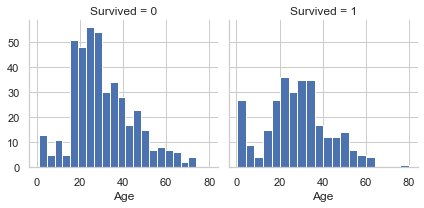

In [26]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Infants (Age <=4) had high survival rate.

Oldest passengers (Age = 80) survived.

Large number of 15-25 year olds did not survive.

Most passengers are in 15-35 age range.

In [27]:
df['numeric_ticket'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
df['ticket_letters'] = df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1])\
.replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [28]:
df['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [29]:
df['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
c              5
fcc            5
wep            3
pp             3
sopp           3
ppp            2
scah           2
swpp           2
sotono2        2
scow           1
as             1
fa             1
sp             1
sop            1
scahbasle      1
fc             1
sca4           1
sc             1
casoton        1
Name: ticket_letters, dtype: int64

In [30]:
pd.pivot_table(df,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [32]:
pd.pivot_table(df,index='Survived',columns='ticket_letters', values = 'Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [33]:
df['cabin_multiple'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
df['cabin_adv'] = df.Cabin.apply(lambda x: str(x)[0])
df['numeric_ticket'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
df['ticket_letters'] = df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
df['name_title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [34]:
df['norm_sibsp'] = np.log(df.SibSp+1)
df['norm_Parch'] = np.log(df.Parch+1)

df['norm_fare'] = np.log(df.Fare+1)

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: cabin_multiple, Length: 891, dtype: int64

In [ ]:
df.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [ ]:
# Pclass,Name,Sex,Age,Fare,Embarked

In [ ]:
df.hist(bins=15, figsize=(10, 7))
plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(20,5))

sns.distplot(df['Age'].dropna(), kde=False, bins=30, ax=axes[0])
axes[0].set_title('Age Distribution overall')

sns.distplot(df[df['Sex']=='male']['Age'].dropna(),
             kde=False, color='blue', bins=30, ax=axes[1])
axes[1].set_title('Age Distribution (Male)')

sns.distplot(df[df['Sex']=='female']['Age'].dropna(),
             kde=False, color='orange', bins=30, ax=axes[2])
axes[2].set_title('Age Distribution (Female)')

sns.kdeplot(df[df['Sex']=='male']['Age'].dropna(),
            color='blue', ax=axes[3])
sns.kdeplot(df[df['Sex']=='female']['Age'].dropna(),
            color='orange', ax=axes[3])

The distributions by sex are similar

There are extreme values (outliers?)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.countplot(x='Sex', data=df, ax=axes[0])
axes[0].set_title('Number of males and females')

sns.countplot(x='Sex', hue='Survived', data=df, ax=axes[1], palette='Set3')
axes[1].set_title('Survival by sex')
axes[1].set_ylabel('')

There are more males than females

Males tend to die, Females tend to survive

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))

sns.countplot(x='Pclass', data=df, ax=axes[0], palette='Set1')
axes[0].set_title('Number of people in each Pclass')

sns.countplot(x='Pclass', hue='Sex', data=df, ax=axes[1])
axes[1].set_title('Sex by Pclass')
axes[1].set_ylabel('')

sns.countplot(x='Pclass', hue='Survived', data=df, ax=axes[2], palette='Set3')
axes[2].set_title('Survival by Pclass')
axes[2].set_ylabel('')

plt.tight_layout()

More people in third class

Higher ratio Survive:Die in third class

More men than women die indepentedly of the class

In [ ]:
grid = sns.FacetGrid(df, col='Pclass', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Embarked', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [ ]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Pclass=3 had most passengers, however most did not survive. 

Infant passengers in Pclass=2 and Pclass=3 mostly survived.

Most passengers in Pclass=1 survived.

Pclass varies in terms of Age distribution of passengers.

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))

sns.countplot(x='Embarked', data=df, ax=axes[0], palette='Set1')
axes[0].set_title('Number of people in each Embarkation')

sns.countplot(x='Embarked', hue='Sex', data=df, ax=axes[1])
axes[1].set_title('Sex by Embarcation')
axes[1].set_ylabel('')

sns.countplot(x='Embarked', hue='Survived', data=df, ax=axes[2], palette='Set3')
axes[2].set_title('Survival by Embarcation')
axes[2].set_ylabel('')

plt.tight_layout()

In [ ]:
grid = sns.FacetGrid(df, col='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

Female passengers had much better survival rate than males.

Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.

Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports.

Ports of embarkation have varying survival rates for Pclass=3 and among male passengers.

In [ ]:
grid = sns.FacetGrid(df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

Survival rates

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(14,5))

sns.pointplot(x ='Sex', y="Survived", data=df, ax=axes[0])
axes[0].set_title('Survival by Sex')

sns.pointplot(x ='Pclass', y="Survived", data=df, ax=axes[1])
axes[1].set_title('Survival by Pclass')
axes[1].set_ylabel('')

sns.pointplot(x ='Embarked', y="Survived", data=df, ax=axes[2])
axes[2].set_title('Survival by Embarkation')
axes[2].set_ylabel('')

for ax in axes:
    ax.set_yticks(np.arange(0, 1.1, 0.1))

plt.tight_layout()

# Numerical variables

In [ ]:
def tukey_outliers(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    
    iqr = q3-q1
    
    min_range = q1 - iqr*1.5
    max_range = q3 + iqr*1.5
    
    outliers = x[(x<min_range) | (x>max_range)]
    return outliers

In [ ]:
nums = ['Age', 'Fare']

for col in nums:
    outliers = tukey_outliers(df[col])
    if len(outliers):
        print(f"* {col} has these tukey outliers,\n{outliers}\n")
    else:
        print(f"* {col} doesn't have any tukey outliers.\n")

In [ ]:
sns.boxplot(x='Survived', y='Age', data=df, palette='Set3')
plt.title('Survival by Age')

In [ ]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

print("Before Shape:",df.shape)
## Removing humidity bellow 0 outliers
df2 = df[(df['Age']<66)]
print("After Shape:",df2.shape)

sns.boxplot(df['Age'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df2['Age'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
# Replace new dataset with previous and resetting indexes
# df=df2;
# df=df.reset_index(drop=True)

In [ ]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Survival by Fare')

In [ ]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

print("Before Shape:",df.shape)
## Removing humidity bellow 0 outliers
df2 = df[(df['Fare']<46)]
print("After Shape:",df2.shape)

sns.boxplot(df['Fare'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df2['Fare'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
# Replace new dataset with previous and resetting indexes
# df=df2;
# df=df.reset_index(drop=True)

In [ ]:
df.corr()['Survived']

In [ ]:
plt.figure(figsize=(8,8))

sns.heatmap(df.corr(), annot=True, cmap='magma', square=True,
            linecolor="white", linewidths=0.1)
plt.title('Correlations between variables')

Create Family size (Family = SibSp + Parch) and Alone if doesn't have family members

Fill all the missing values of Age in both dataframes (with mean based on Sex and Pclass) -> Maybe use some algorithm to predict them, in a future project.

Fill 2 values of Emarked from df_train with the most common one or check in relation with other variables


In [ ]:
df['Familysize'] = df['SibSp'] + df['Parch']+1

df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()\
.sort_values(by='Survived', ascending=False)

In [ ]:
df['Alone'] = df['Familysize'].apply(lambda x: 1 if x == 0 else 0)

In [ ]:
df[df['Embarked'].isnull()]

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16,8))

sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=df, ax=axes[0,0])

sns.boxplot(x="Embarked", y="Fare", hue="Sex", data=df, ax=axes[0,1])

sns.boxplot(x="Embarked", y="Fare", hue="Survived", data=df, ax=axes[1,0])

sns.boxplot(x="Embarked", y="Fare", hue="Alone", data=df, ax=axes[1,1])

plt.tight_layout()

### Based on the median values of the plots seems likely to be 'C' > 'S', definitely is not Q. I'll go with C since Pclass, Sex and Survived point to that.

In [ ]:
df['Embarked'].fillna('C',inplace=True)

In [ ]:
plt.figure(figsize=(12, 7))

testPlot = sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df)

m1 = df.groupby(['Pclass', 'Sex'])['Age'].median().values
mL1 = [str(np.round(s, 2)) for s in m1]

ind = 0
for tick in range(len(testPlot.get_xticklabels())):
    testPlot.text(tick-.2, m1[ind+1]+1, mL1[ind+1],  horizontalalignment='center',  color='w', weight='semibold')
    testPlot.text(tick+.2, m1[ind]+1, mL1[ind], horizontalalignment='center', color='w', weight='semibold')
    ind += 2

In [ ]:
m1[0+1]+1

In [ ]:
m1[0]+1

In [ ]:
m1

In [ ]:
def get_age(cols):
    age = cols[0]
    pclass = cols[1]
    sex = cols[2]
    
    if pd.isnull(age):

        if pclass == 1:
            if sex == 'male':
                return 40
            else:
                return 35

        elif pclass == 2:
            if sex == 'male':
                return 30
            else:
                return 28

        else:
            if sex == 'male':
                return 25
            else:
                return 21.5
            
    else:
        return age

In [ ]:
df['Age'] = df[['Age','Pclass', 'Sex']].apply(get_age, axis=1)

In [ ]:
def get_title(name):
    for string in name.split():
        if '.' in string:
            return string[:-1]

In [ ]:
df['Title'] = df['Name'].apply(lambda x: get_title(x))

In [ ]:
df.Title.value_counts()

In [ ]:
df.Name[10].split()

In [ ]:
df.drop('Name', axis=1, inplace=True)

In [ ]:
# ['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
#        'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
#        'Jonkheer']

In [ ]:
df['Title'] = df['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 
                                             'Major', 'Rev', 'Sir', 'Dona', 'Countess', 'Jonkheer'], 'Other')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [ ]:
df.Title.value_counts()

In [ ]:
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
df['Title_num'] = df['Title'].map(title_mapping)
df['Title_num'] = df['Title_num'].fillna(0)

In [ ]:
df.Title_num.value_counts()

In [ ]:
df['Sex_num'] = df['Sex'].replace( {'female': 0, 'male': 1})

In [ ]:
df['Embarked_num'] = df['Embarked'].replace( {'S': -1, 'Q': 0, 'C': 1})

In [ ]:
df['Pclass_num'] = df['Pclass'].replace( {1: -1, 2: 0, 3: 1})

In [ ]:
grid = sns.FacetGrid(df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [ ]:
guess_ages = np.zeros((2,3))

for i in range(0, 2):
    for j in range(0, 3):
        guess_df = df[(df['Sex'] == i) & (df['Pclass'] == j+1)]['Age'].dropna()

        # age_mean = guess_df.mean()
        # age_std = guess_df.std()
        # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

        age_guess = guess_df.median()

        # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
for i in range(0, 2):
    for j in range(0, 3):
        df.loc[ (df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j+1),'Age'] = guess_ages[i,j]

df['Age'] = df['Age'].astype(int)



In [ ]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

In [ ]:
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age']


In [ ]:
df = df.drop(['AgeBand'], axis=1)

In [ ]:
df['Age*Class'] = df.Age * df.Pclass

In [ ]:
df['FareBand'] = pd.qcut(df['Fare'], 4)
df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

In [ ]:
df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
df.loc[ df['Fare'] > 31, 'Fare'] = 3
df['Fare'] = df['Fare'].astype(int)

df = df.drop(['FareBand'], axis=1)

In [ ]:
sex = pd.get_dummies(df['Sex'], prefix='Sex', drop_first=True)
embarked = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True)
pclass = pd.get_dummies(df['Pclass'], prefix='Pclass', drop_first=True)
title = pd.get_dummies(df['Title'], prefix='Title', drop_first=True)

df.drop(['Sex', 'Embarked', 'Pclass', 'Title'], axis=1, inplace=True)

df = pd.concat([df, sex, embarked, pclass, title], axis=1)

In [ ]:
df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1,inplace=True)

In [ ]:
df.corr()['Survived'].sort_values()[:-1]

In [ ]:
df.corr()['Survived'].sort_values()[:-1].plot.bar()

In [ ]:
df.Age.unique().max()

In [ ]:
df.Age.unique().min()

In [ ]:
df.Fare.unique().max()

In [ ]:
df.Fare.unique().min()

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)

In [ ]:
# scaler = StandardScaler()
# df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [ ]:
df.Survived.value_counts()

In [ ]:
df.shape

In [ ]:
549 /891

In [ ]:
logreg = LogisticRegression(random_state=121)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

In [ ]:
logreg = LogisticRegression(random_state=121)

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.05, 0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,18],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [ ]:
model = GridSearchCV(logreg, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

model.fit(X_train, y_train)

print('Best Params:', model.best_params_)

In [ ]:
# C=0.9, penalty='l1', solver='liblinear' ,83.80

In [ ]:
best_lr = LogisticRegression(C=6,penalty='l2',solver='liblinear')
best_lr.fit(X_train, y_train)
y_pred = best_lr.predict(X_test)

In [ ]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%')
print('-'*55)
print(classification_report(y_test, y_pred))
print('-'*55)
print(confusion_matrix(y_test, y_pred))

In [ ]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    pred_i = knn.predict(X_test)
    
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
# Plot Error rate vs Number of neighbors
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate,color='blue', ls='--',
         marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('Neighbors')
plt.ylabel('Error rate')
plt.title('Error rate vs Number of neighbors')

In [ ]:
# algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'}


In [ ]:
knn = KNeighborsClassifier(n_neighbors=15,algorithm='ball_tree',n_jobs=-1)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%')
print('-'*55)
print(classification_report(y_test, y_pred))
print('-'*55)
print(confusion_matrix(y_test, y_pred))

In [ ]:
rf = RandomForestClassifier(random_state=121)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

In [ ]:
param_grid = {
   'criterion':['giny', 'entropy'],
   'n_estimators':[50, 100, 500, 750, 1000],
   'max_depth':[5,6,7, 8,9,10],
   'min_samples_split':[2, 5, 10, 15, 100],
   'min_samples_leaf':[1, 5, 10]}

In [ ]:
model = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)

model.fit(X_train, y_train)

print('Best Params:', model.best_params_)

In [ ]:
best_rf = RandomForestClassifier(random_state=121, criterion='entropy', max_depth=9, min_samples_leaf=5, min_samples_split=2, n_estimators=50)

best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%')
print('-'*55)
print(classification_report(y_test, y_pred))
print('-'*55)
print(confusion_matrix(y_test, y_pred))

In [ ]:
# LogisticRegression, LinearSVC,SVC, GaussianNB, KNeighborsClassifier,RandomForestClassifier,GradientBoostingClassifier,
# BaggingClassifier,AdaBoostClassifier, DecisionTreeClassifier, XGBClassifier, CatBoostClassifier,LGBMClassifier

In [ ]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=10,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
nb_classifier = GaussianNB(var_smoothing= 8.111308307896872e-05)

nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
SVC_classifier = SVC()

SVC_classifier.fit(X_train, y_train)

y_pred = SVC_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(confusion_matrix(y_test, y_pred))

In [ ]:
LinearSVC_classifier = LinearSVC()

LinearSVC_classifier.fit(X_train, y_train)

y_pred = LinearSVC_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(confusion_matrix(y_test, y_pred))

In [ ]:
GradientBoosting_classifier = GradientBoostingClassifier()

GradientBoosting_classifier.fit(X_train, y_train)

y_pred = GradientBoosting_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
Bagging_classifier = BaggingClassifier()

Bagging_classifier.fit(X_train, y_train)

y_pred = Bagging_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
AdaBoost_classifier = AdaBoostClassifier()

AdaBoost_classifier.fit(X_train, y_train)

y_pred = AdaBoost_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
xgb = XGBClassifier(random_state=121)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
CatBoost_classifier = CatBoostClassifier()

CatBoost_classifier.fit(X_train, y_train)

y_pred = CatBoost_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
LGBM_classifier = LGBMClassifier()

LGBM_classifier.fit(X_train, y_train)

y_pred = LGBM_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
classifiers = [('Logistic Regression', best_lr),
               ('KNN', knn),
               ('Random Forest', best_rf),
               ('Xgboost', xgb)]

for name_clf, clf in classifiers:
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name_clf} accuracy: {round(acc, 3)}%')

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=classifiers,voting='soft')

vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

acc_vc = accuracy_score(y_test, y_pred)

print(f'Ensembler Accuracy: {round(acc_vc, 3)}%')

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

In [ ]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

In [ ]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)